In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Timestamp
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 4) 


plt.rcParams["figure.dpi"] = 400

raw = pd.read_csv("USCurves.csv")

MONTH = 'MONTH'
YEAR = 'YEAR'
MONTHS_IN_YEAR = 12
raw.columns

Index(['date', 'BC_1MONTH', 'BC_3MONTH', 'BC_6MONTH', 'BC_1YEAR', 'BC_2YEAR',
       'BC_3YEAR', 'BC_5YEAR', 'BC_7YEAR', 'BC_10YEAR', 'BC_20YEAR',
       'BC_30YEAR', 'BC_30YEARDISPLAY'],
      dtype='object')

In [3]:
column_mutations = {}

In [4]:
for i in range(1, len(raw.columns)-1):
    x = raw.columns[i]
    if YEAR in x or MONTH in x:
        time_str = x[3:]
        if YEAR in x:
            time_str = time_str.split(YEAR)[0]
            time = float(time_str)
        elif MONTH in x:
            time_str = time_str.split(MONTH)[0]
            time = float(time_str) / MONTHS_IN_YEAR
        else:
            raise RuntimeError("This branch should never execute")


    column_mutations[raw.columns[i]] = time

In [5]:
new_columns = raw.rename(columns=column_mutations)
yield_curves = new_columns.set_index(pd.to_datetime(new_columns["date"])).drop(["date", "BC_30YEARDISPLAY"], axis=1)

In [12]:
yield_curves.drop(columns=20, inplace=True)

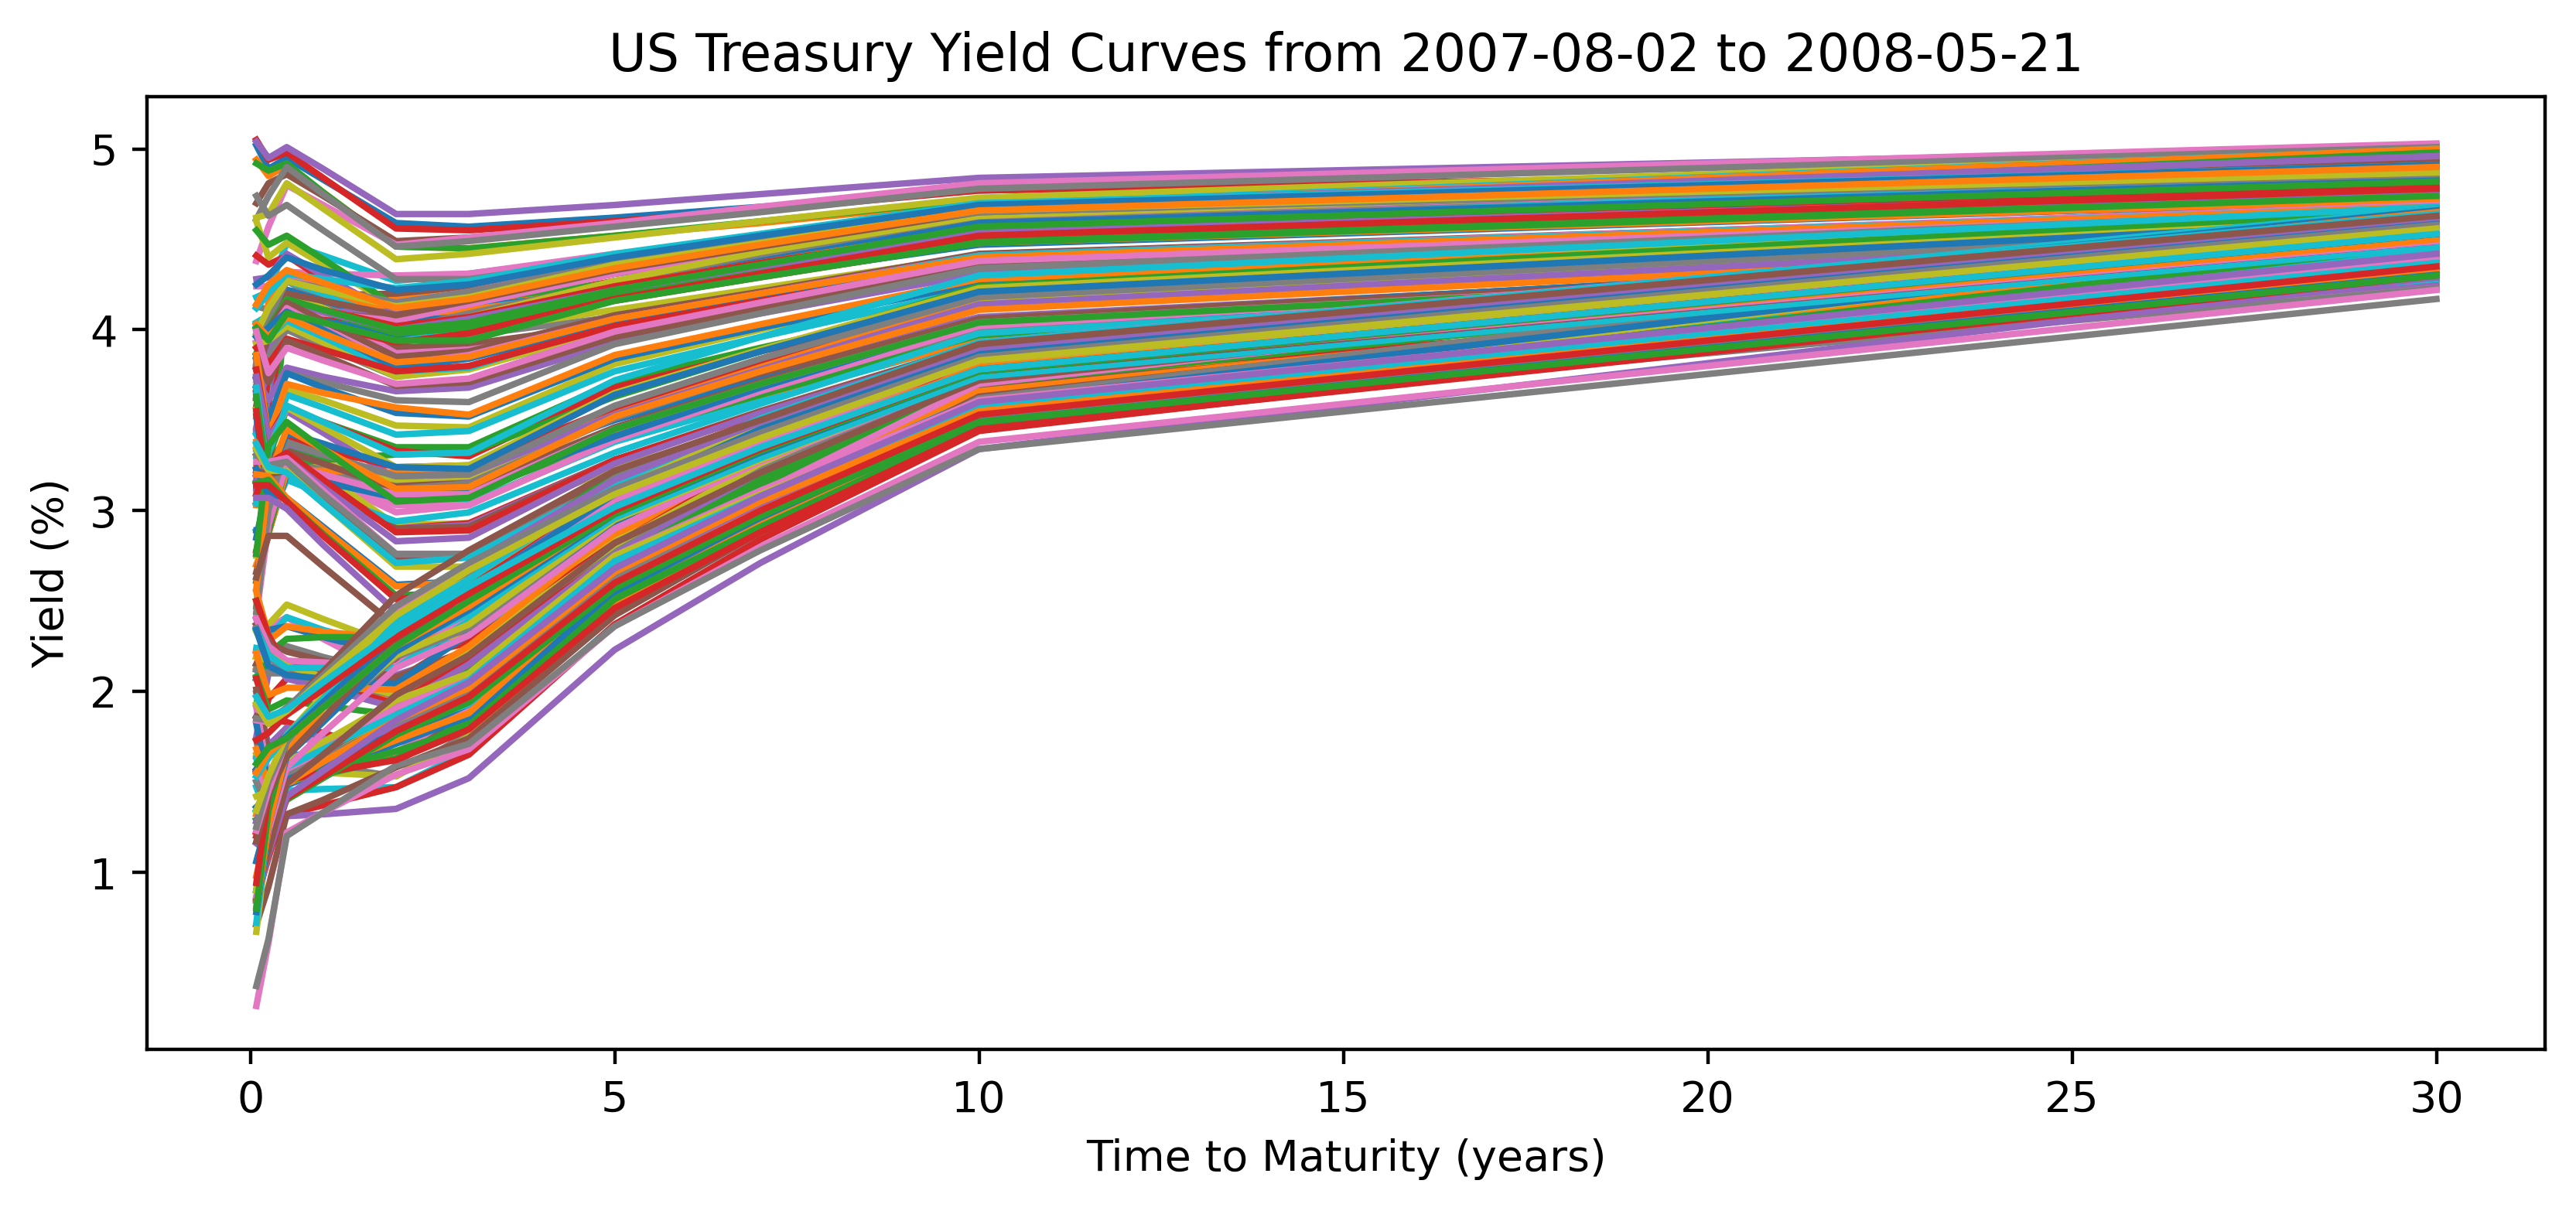

In [19]:
start_idx = 4400
num_curves = 200
end_idx = start_idx + num_curves

start_date: Timestamp = yield_curves.iloc[start_idx].name  # pyright: ignore[reportAssignmentType]
end_date: Timestamp = yield_curves.iloc[end_idx].name  # pyright: ignore[reportAssignmentType]
plt.plot(yield_curves.iloc[start_idx:end_idx].T)
plt.title(f"US Treasury Yield Curves from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
plt.xlabel("Time to Maturity (years)")
plt.ylabel("Yield (%)")
plt.show()

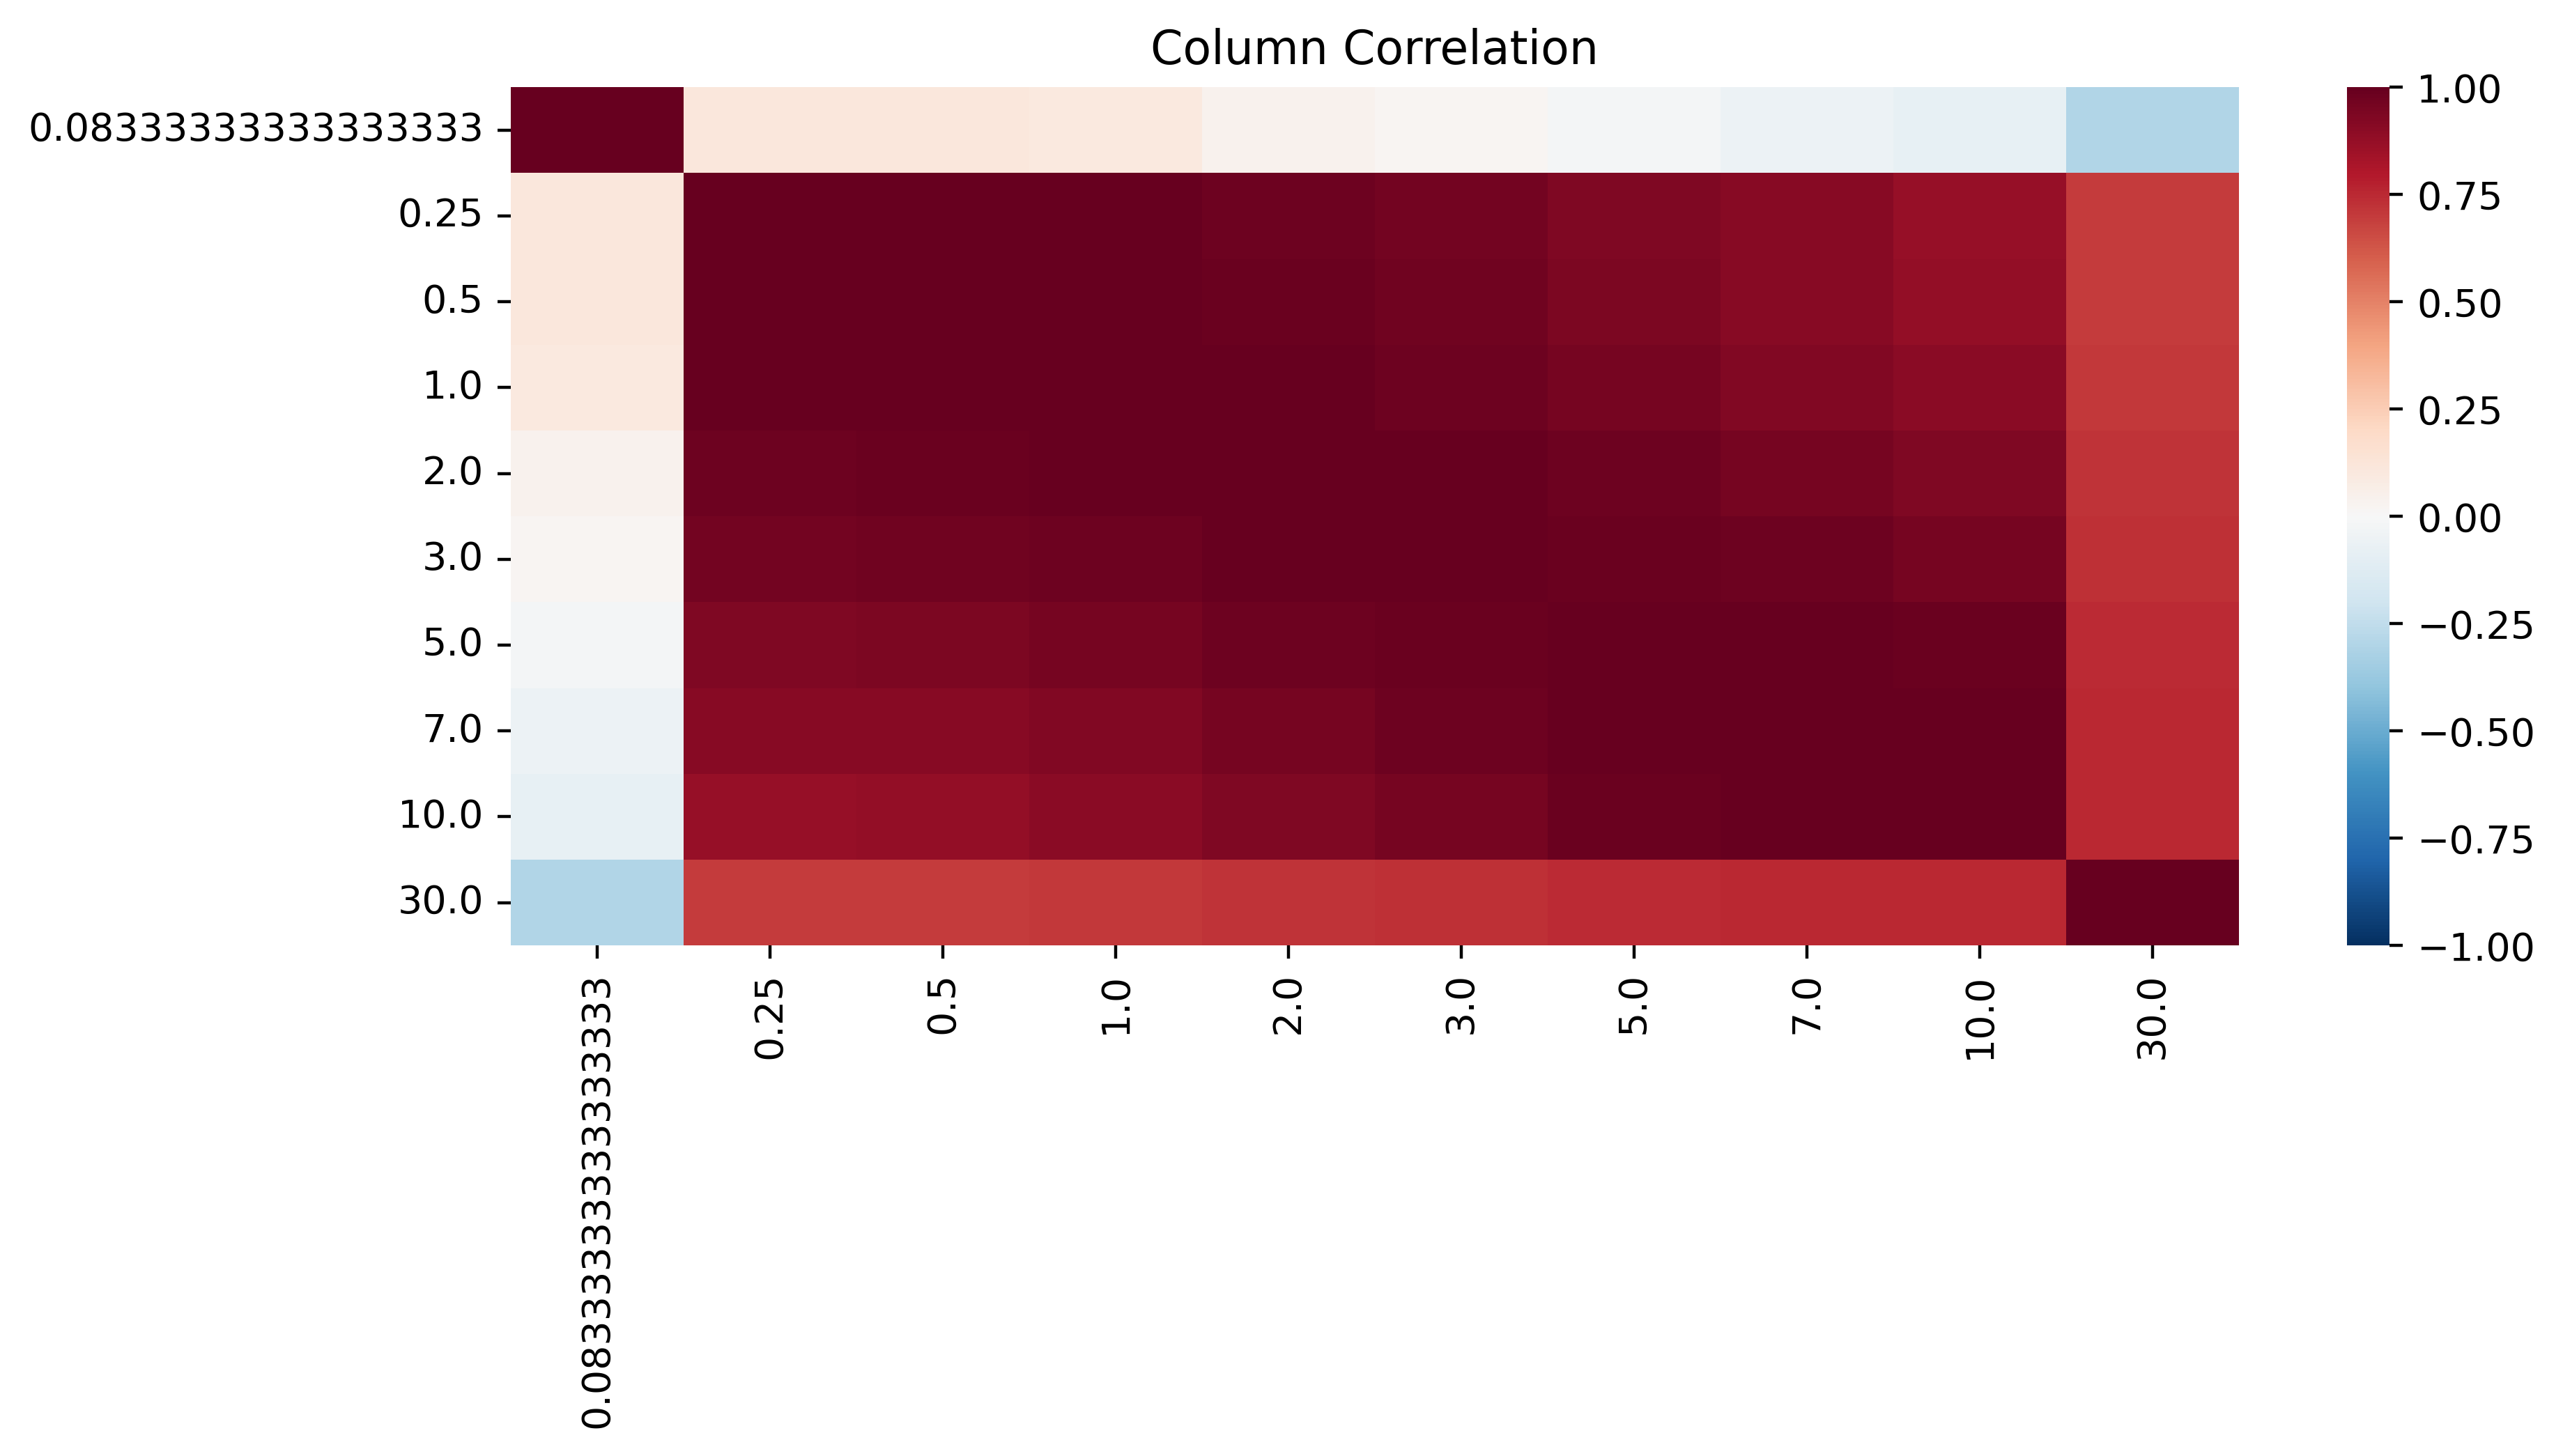

In [14]:
sns.heatmap(yield_curves.select_dtypes(include="number").corr(), cmap="RdBu_r", vmin=-1, vmax=1)
plt.title("Column Correlation")
plt.show()

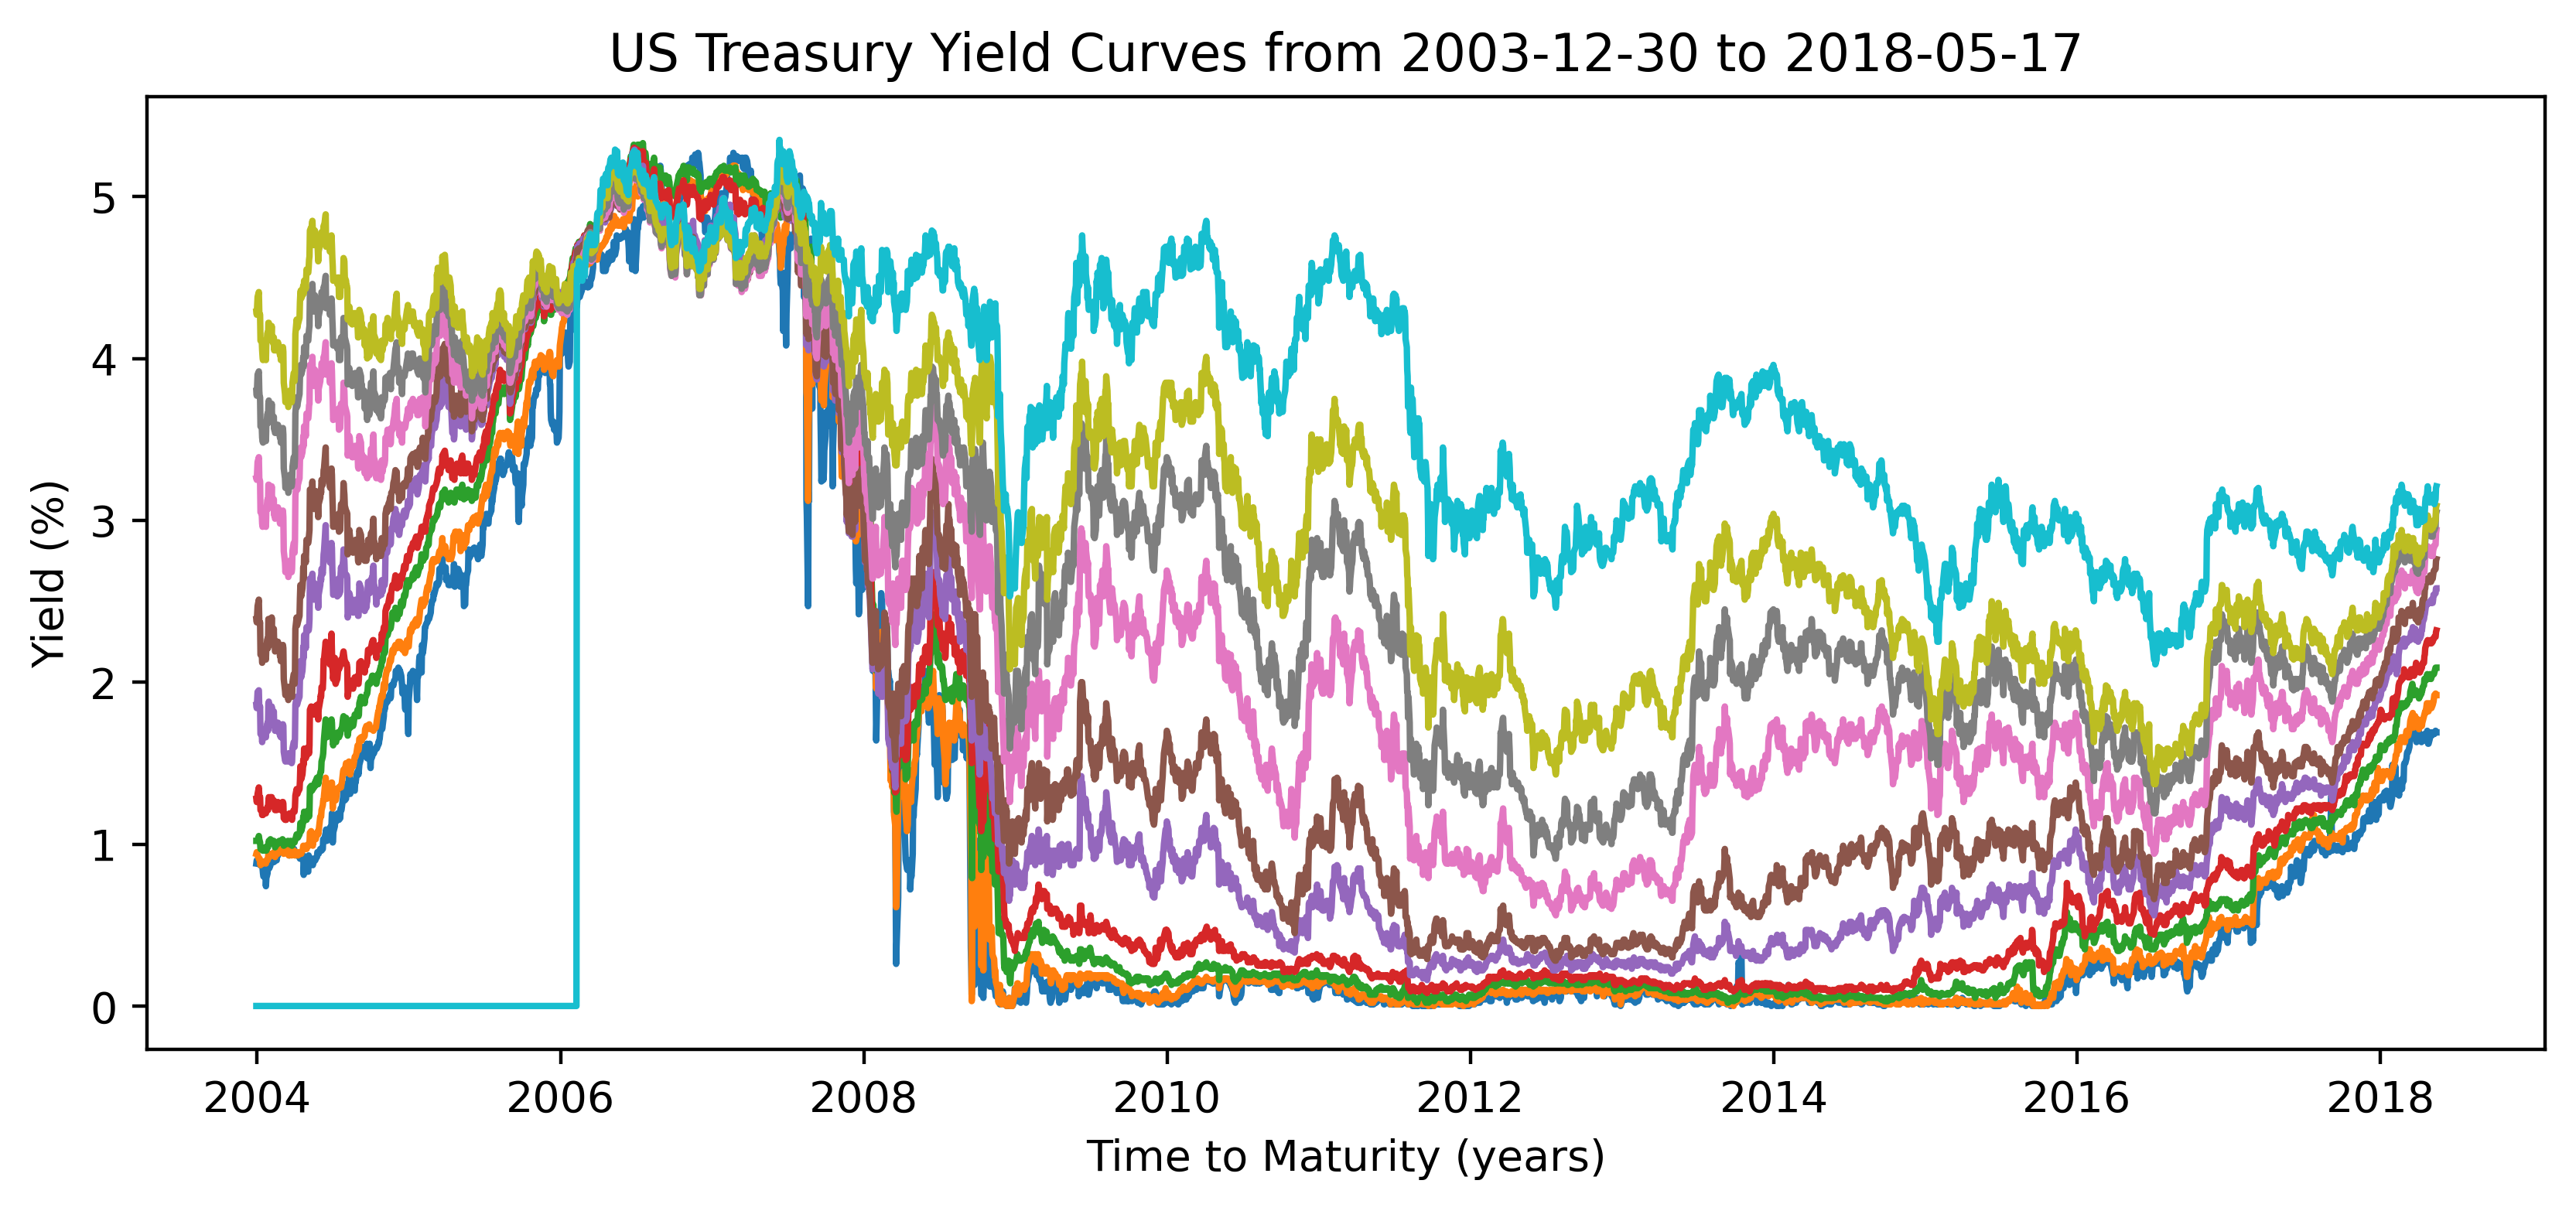

In [29]:
start_idx = 4400 - 900
num_curves = 3600
end_idx = start_idx + num_curves

start_date: Timestamp = yield_curves.iloc[start_idx].name  # pyright: ignore[reportAssignmentType]
end_date: Timestamp = yield_curves.iloc[end_idx].name  # pyright: ignore[reportAssignmentType]
plt.plot(yield_curves.iloc[start_idx:end_idx])
plt.title(f"US Treasury Yield Curves from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
plt.xlabel("Time to Maturity (years)")
plt.ylabel("Yield (%)")
plt.show()

Next information:
- Plot rolling vol, and rolling vol correlation
- MR property relative to RF rate according to literature models

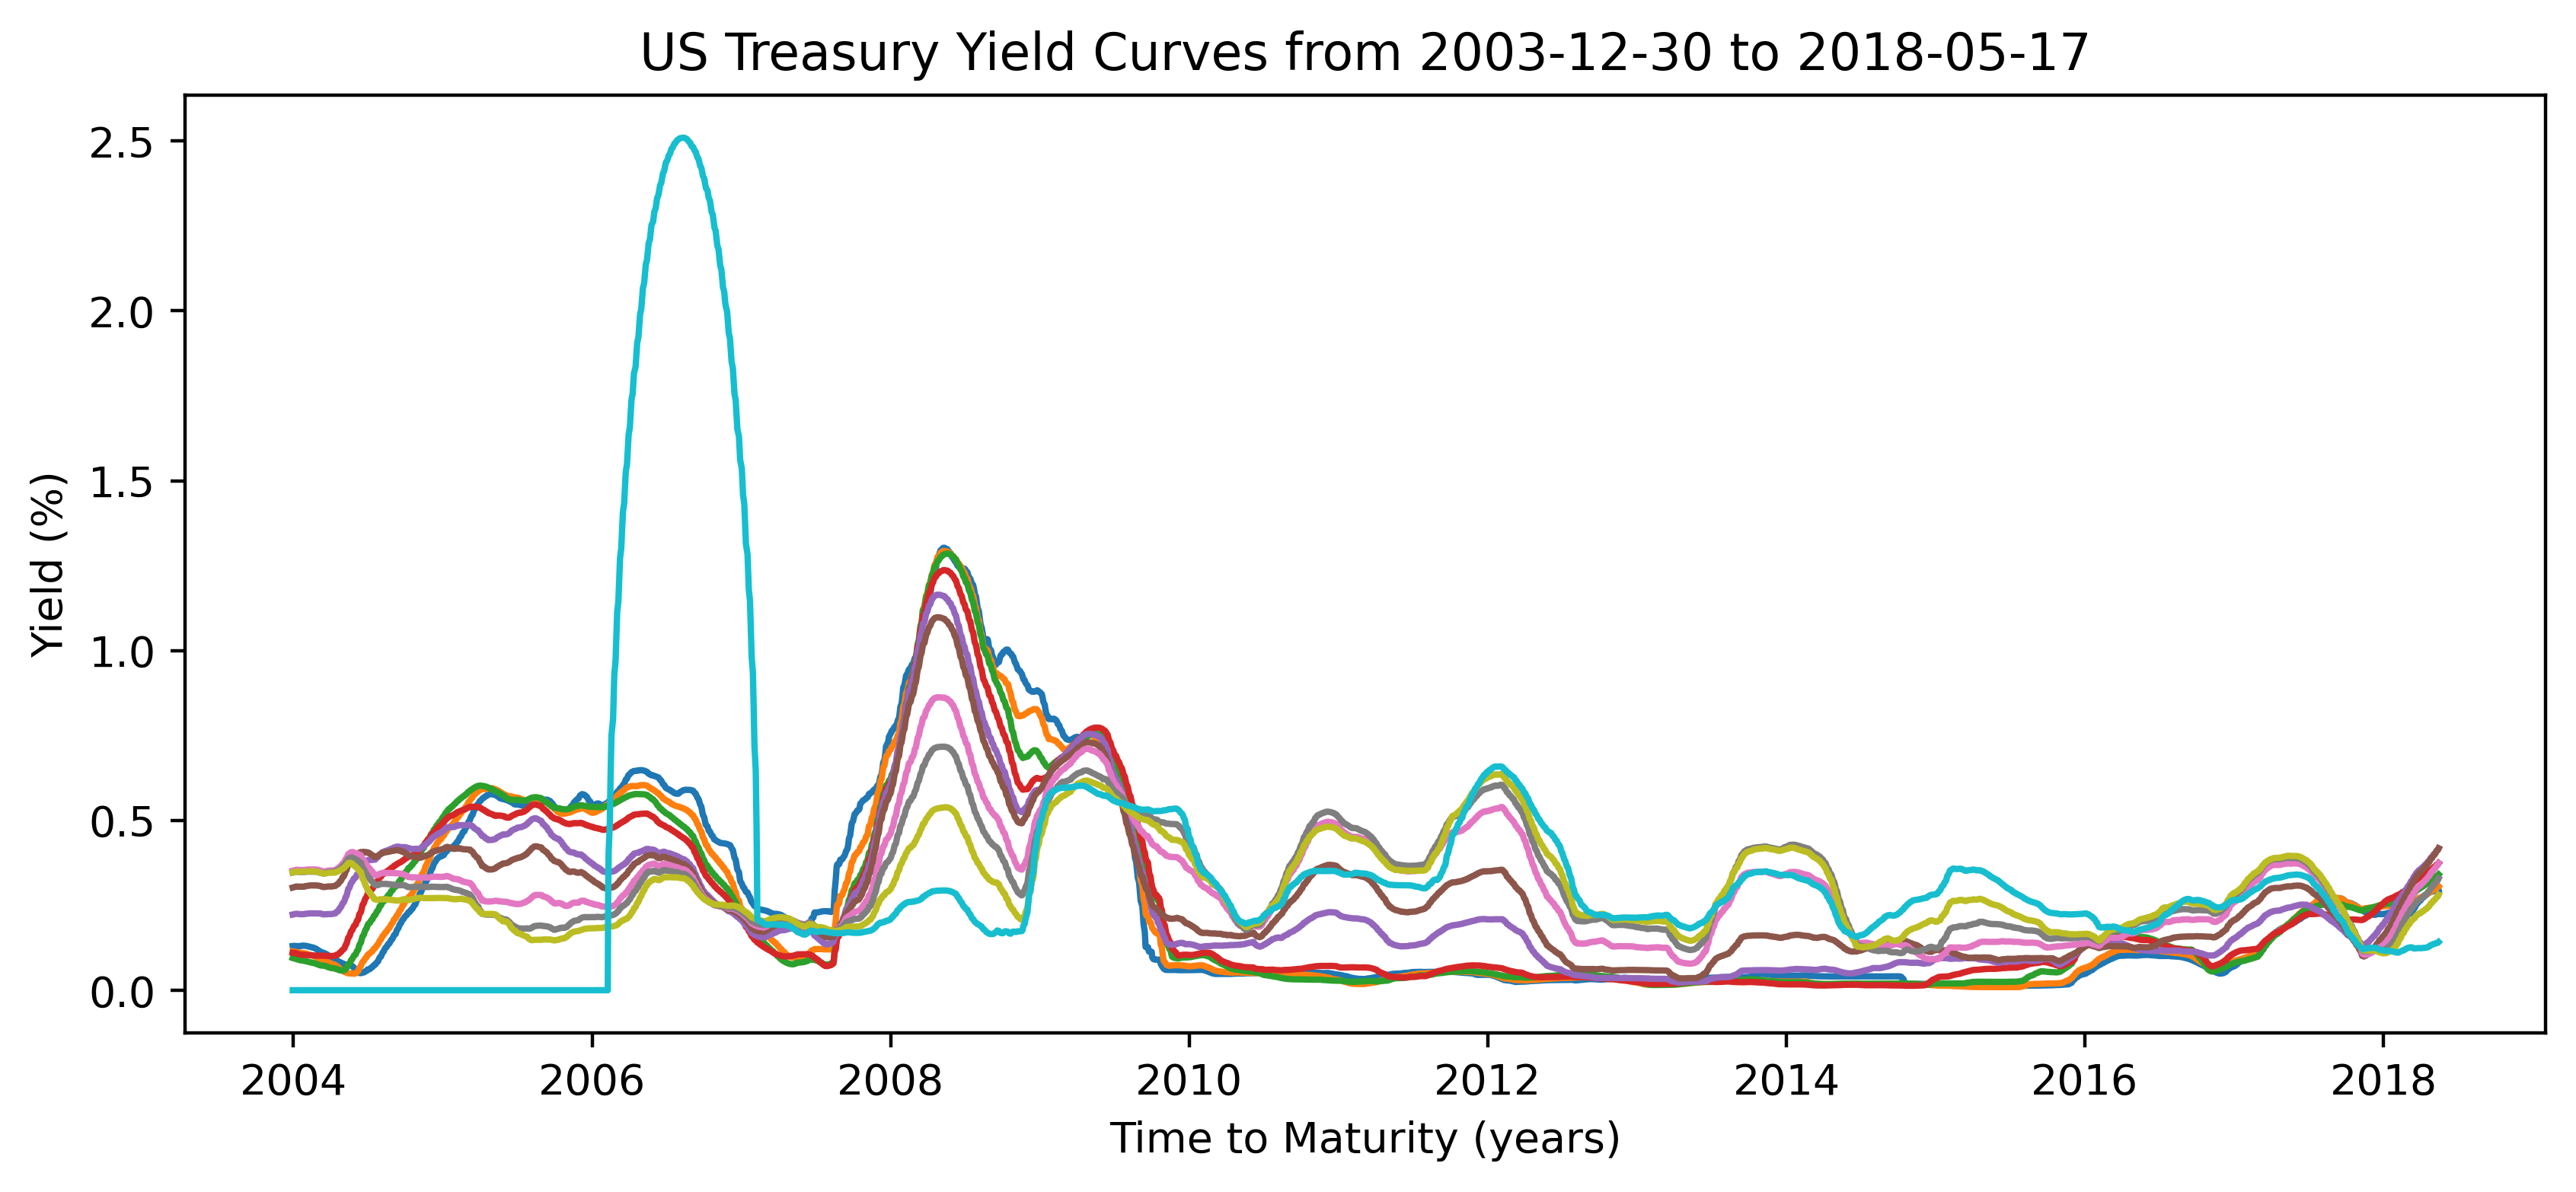

In [32]:
start_idx = 4400 - 900
num_curves = 3600
end_idx = start_idx + num_curves
rolling_vol = yield_curves.rolling(252).std()

start_date: Timestamp = rolling_vol.iloc[start_idx].name  # pyright: ignore[reportAssignmentType]
end_date: Timestamp = rolling_vol.iloc[end_idx].name  # pyright: ignore[reportAssignmentType]
plt.plot(rolling_vol.iloc[start_idx:end_idx])
plt.title(f"US Treasury Yield Curves from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
plt.xlabel("Time to Maturity (years)")
plt.ylabel("Yield (%)")
plt.show()


